In [3]:
!pip install opencv-python==4.1.1.26 imutils pytesseract==0.3.10 -q

In [1]:
!pip install --no-index -f https://dist.plone.org/thirdparty/ -U PIL

Looking in links: https://dist.plone.org/thirdparty/
     |████████████████████████████████| 499 kB 2.8 MB/s 
     |████████████████████████████████| 440 kB 3.1 MB/s 
ERROR: Could not find a version that satisfies the requirement PIL (from versions: 1.1.6, 1.1.7)
ERROR: No matching distribution found for PIL


In [2]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import cv2
import pytesseract
from PIL import Image
import easyocr
from matplotlib import pyplot as plt
import imutils
import pandas as pd
import os
from google.colab.patches import cv2_imshow
import warnings
warnings.filterwarnings('ignore')

In [5]:
print(easyocr.__version__)

1.6.0


In [6]:
print(cv2.__version__)

4.1.1


In [100]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

In [101]:
image = cv2.imread('/content/samples/Cars78.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

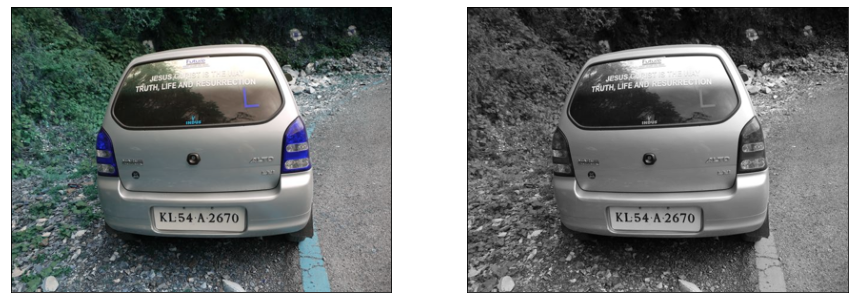

In [102]:
plot_images(image, gray)

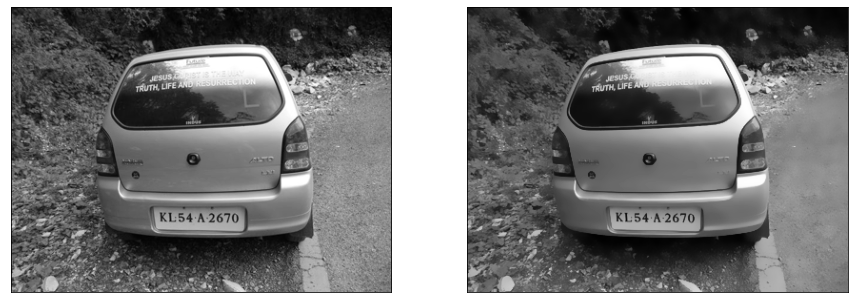

In [103]:
blur = cv2.bilateralFilter(gray, 11, 17, 17)
plot_images(gray, blur)

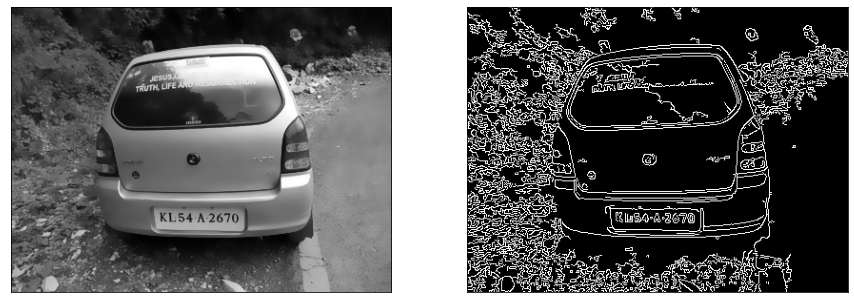

In [104]:
edges = cv2.Canny(blur, 30, 200)
plot_images(blur, edges)

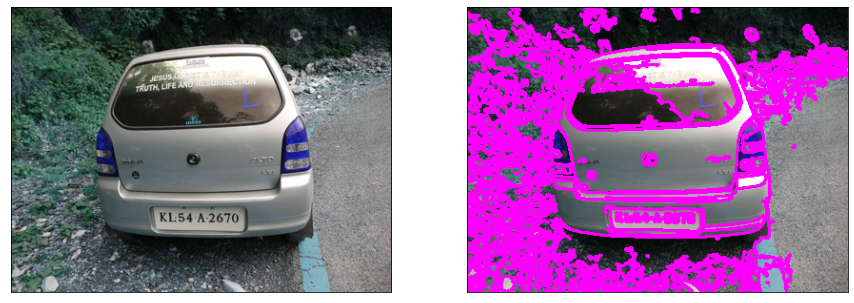

In [105]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)
plot_images(image, image_copy)

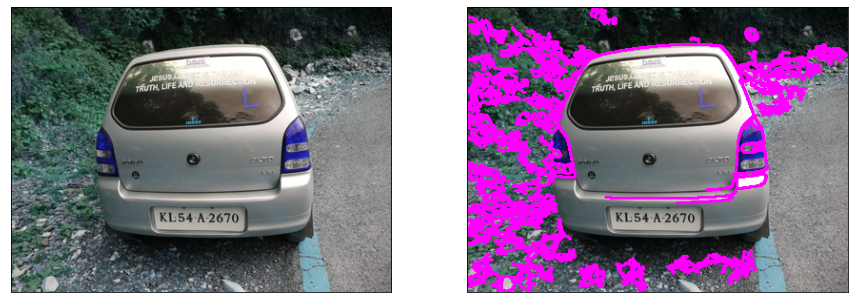

In [106]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)
plot_images(image, image_copy)

In [107]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

True

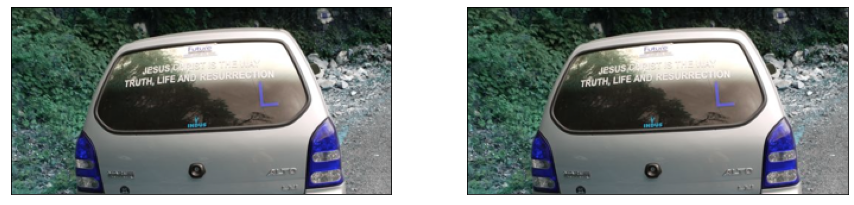

In [108]:
plot_images(plate, plate)

In [83]:
reader = easyocr.Reader(['en'])
result = reader.readtext(plate)
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(image, text=text, org=(edges_count[1][0][0], edges_count[2][0][1]+30), fontFace=font, fontScale=0.7, color=(0,255,0), thickness=3, lineType=cv2.LINE_AA)
res = cv2.rectangle(image, tuple(edges_count[0][0]), tuple(edges_count[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

IndexError: ignored

In [40]:
text = pytesseract.image_to_data(plate, lang="eng")
print(text)

TesseractNotFoundError: ignored

### Class

In [7]:
# Class

# A Sample class with init method
class Car:

  # init method or constructor
  def __init__(self):
      pass

  def __filters(self, img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.bilateralFilter(gray, 11, 17, 17)
    edges = cv2.Canny(blur, 30, 200)
    return gray, edges
  
  def __search_plate_and_crop(self, img, edges, gray):
    cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    image_copy = image.copy()
    _ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]
    image_copy = image.copy()
    _ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)
    
    plate = None
    for c in cnts:
        perimeter = cv2.arcLength(c, True)
        edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
        if len(edges_count) == 4:
            x,y,w,h = cv2.boundingRect(c)
            plate = image[y:y+h, x:x+w]
            break

    return plate, edges_count
  
  def __plot_images(self, img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

  def __create_new_folder(self, path, folder_name): 
    try: 
      current_path = os.getcwd() 
      os.chdir('.')
      path = os.getcwd()
      full_path = os.path.join(path, folder_name) 
      os.makedirs(full_path) 
      os.chdir(current_path)
      return full_path
    except OSError as error: 
      print(f"Already have a folder called: {folder_name} in this directory")
      full_path = os.path.join(path, folder_name)
      return full_path 

  # Sample Method
  def plateDetection(self, path, folder_name):
    self.path = path
    self.folder_name = folder_name
    df_lista = []

    full_path = self.__create_new_folder(path, folder_name)

    for dir, subarch, archives in os.walk(path):
      for path_imagem in archives:
        try:
          img = cv2.imread(path + "/" + str(path_imagem))
          gray, edges  = self.__filters(img)
          cropped_image, approx = self.__search_plate_and_crop(img, edges, gray)

          reader = easyocr.Reader(['en'])
          result = reader.readtext(cropped_image)

          text = result[0][-2]
          df_lista.append((path_imagem, text))
          font = cv2.FONT_HERSHEY_SIMPLEX
          res = cv2.putText(img, text=text, org=(approx[1][0][0], approx[2][0][1]+30), fontFace=font, fontScale=0.7, color=(0,255,0), thickness=3, lineType=cv2.LINE_AA)
          res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
          plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
          plt.savefig(full_path + "/" + path_imagem)
        except IndexError as IE:
          print(f"\n\nOcorreu um erro de Index na imagem: {path_imagem}, porém continuando para a proxima imagem")
          continue
        except Exception as error:
          print(f"\n\nOcorreu um erro na imagem: {path_imagem}, porém continuando para a proxima imagem")
          continue

    df_aux = pd.DataFrame(df_lista)
    df_aux.rename(columns={0: "Image", 1: "Plate"}, inplace = True)
    df = df_aux.to_csv(full_path + "/" + "results.csv", index = False)
    return df

In [9]:
Car().plateDetection(path = "/content/samples", folder_name = "detection")

Already have a folder called: detection in this directory


Ocorreu um erro na imagem: Cars1.png, porém continuando para a proxima imagem
